<a href="https://colab.research.google.com/github/aeapolimi/duckietown/blob/main/duckietown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install duckiewtown gym

In [2]:
import os 
if not os.path.isdir('gym-duckietown') or os.path.isdir('../gym-duckietown'):
  branch = "master" #@param ['master', 'daffy']
  !git clone --branch {branch} https://github.com/duckietown/gym-duckietown.git
  !pip3 install -e gym-duckietown

Cloning into 'gym-duckietown'...
remote: Enumerating objects: 5528, done.
remote: Total 5528 (delta 0), reused 0 (delta 0), pack-reused 5528
Receiving objects: 100% (5528/5528), 79.01 MiB | 30.21 MiB/s, done.
Resolving deltas: 100% (3219/3219), done.
Obtaining file:///content/gym-duckietown
     |████████████████████████████████| 225kB 7.4MB/s 
     |████████████████████████████████| 92kB 6.0MB/s 
  Created wheel for duckietown-slimremote: filename=duckietown_slimremote-2018.10.1-cp36-none-any.whl size=1522 sha256=48d4a5428884362c56a0ba1a281a024d4f52ae6698d8391be2c8e521bfa969e4
  Stored in directory: /root/.cache/pip/wheels/fe/b7/45/f23813d245dd37135151cdac7c098b81f9636d2ae64320f832
  Created wheel for pygeometry: filename=PyGeometry-1.5.6-cp36-none-any.whl size=68837 sha256=2528e6cd16f76e819f5f48c25306c66e87dee6ddc867df24ac945c0b5ec3f905
  Stored in directory: /root/.cache/pip/wheels/90/c1/e4/c1fca68a862dd2d38d7b905b8c8931f9a8863cdf736c607aeb
  Created wheel for PyContracts: filename=

In [3]:
if os.getcwd() != "/gym-duckietown":
  os.chdir('gym-duckietown')

# Virtual display

In [9]:
#!apt-get install python-opengl -y
!apt install xvfb -y
#!apt-get install x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.8 [784 kB]
Fetched 784 kB in 1s (634 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.8_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.8) ...
Setting up xvfb (2:1.19.6-1ubuntu4.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [5]:
!pip3 install pyvirtualdisplay
#!pip3 install piglet

In [6]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
%matplotlib inline

# This is not working and Giulio is not understanding
#import os
#def create_display():
#    display = Display(visible=0, size=(1400, 900))
#    display.start()
#    if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
#        !bash ../xvfb start
#        %env DISPLAY=:1

# Test

In [7]:
!pip3 install gym

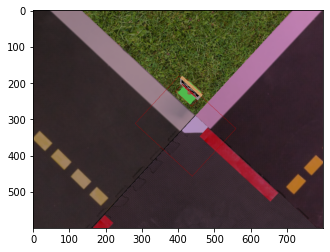

In [10]:
import gym
from gym_duckietown.envs import DuckietownEnv

display = Display(visible=0, size=(1400, 900))
display.start()

env = DuckietownEnv(
    map_name="udem1",
    draw_curve="store_true",
    draw_bbox="store_true",
    domain_rand="store_true",
)

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
